## **Importar librerias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

In [ ]:
import os
import seaborn as sns
import plotly.express as px 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

## **Importar dataset desde URL**

In [ ]:
# enlace de descarga directa del archivo csv
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"


column_names = ['class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat']

# cargar datos en dataframe de pandas
datao = pd.read_csv(url, names=column_names)
datao

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
print(datao.dtypes)

class          object
age            object
menopause      object
tumor_size     object
inv_nodes      object
node_caps      object
deg_malig       int64
breast         object
breast_quad    object
irradiat       object
dtype: object


## **Cambio de variables str a variables numéricas**
Reemplazo de valores ('?') en cada caso necesario

In [ ]:
col_str = 'class'

# especificar categorías a clasificar
categorias = ['no-recurrence-events', 'recurrence-events']

# crear objeto LabelEncoder y ajustar a las categorías
le = LabelEncoder()
le.fit(categorias)

# transformar los datos
datao[col_str] = le.transform(datao[col_str])
print(datao['class'])

0      0
1      0
2      0
3      0
4      0
      ..
281    1
282    1
283    1
284    1
285    1
Name: class, Length: 286, dtype: int64


In [ ]:
col_str1 = 'age'
categorias1 = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

le = LabelEncoder()
le.fit(categorias1)

datao[col_str1] = le.transform(datao[col_str1])

In [ ]:
col_str2 = 'menopause'
categorias2 = ['lt40', 'ge40', 'premeno']

le = LabelEncoder()
le.fit(categorias2)

datao[col_str2] = le.transform(datao[col_str2])

In [ ]:
col_str3 = 'tumor_size'
categorias3 = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']

le = LabelEncoder()
le.fit(categorias3)

datao[col_str3] = le.transform(datao[col_str3])

In [ ]:
col_str4 = 'inv_nodes'
categorias4 = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26', '27-29', '30-32', '33-35', '36-39']

le = LabelEncoder()
le.fit(categorias4)

datao[col_str4] = le.transform(datao[col_str4])

In [ ]:
print(datao['node_caps'].value_counts()['?'])
print(datao['node_caps'].value_counts()['yes'])
print(datao['node_caps'].value_counts()['no'])

8
56
222


In [ ]:
# crear tabla de contingencia
table = pd.crosstab(datao['node_caps'], datao['irradiat'])

# mostrar tabla
print(table)

#si esta en la categoría 'yes' puede recibir o no el tratamiento, indiferentemente. Por lo tanto 
# los valores '?' se envían a la categoría 'no'

irradiat    no  yes
node_caps          
?            2    6
no         188   34
yes         28   28


In [ ]:
col_str5 = 'node_caps'
datao[col_str5] = datao[col_str5].replace('?', 'no')
categorias5 = ['yes', 'no']

le = LabelEncoder()
le.fit(categorias5)

datao[col_str5] = le.transform(datao[col_str5])

In [ ]:
print(datao['node_caps'].value_counts()[0])
print(datao['node_caps'].value_counts()[1])

230
56


In [ ]:
col_str6 = 'deg_malig'
categorias6 = ['1', '2','3']

le = LabelEncoder()
le.fit(categorias6)

datao[col_str6] = le.transform(datao[col_str6])

In [ ]:
col_str7 = 'breast'
categorias7 = ['left', 'right']

le = LabelEncoder()
le.fit(categorias7)

datao[col_str7] = le.transform(datao[col_str7])

In [ ]:
# crear tabla de contingencia
table = pd.crosstab(datao['breast_quad'], datao['irradiat'])

# mostrar tabla
print(table)

irradiat     no  yes
breast_quad         
?             1    0
central      19    2
left_low     82   28
left_up      72   25
right_low    17    7
right_up     27    6


In [ ]:
col_str8 = 'breast_quad'
datao[col_str8] = datao[col_str8].replace('?', 'left_low')
categorias8 = ['left_up', 'left_low', 'right_up', 'right_low', 'central']

le = LabelEncoder()
le.fit(categorias8)

datao[col_str8] = le.transform(datao[col_str8])

In [ ]:
print(datao['irradiat'].value_counts()['yes'])
print(datao['irradiat'].value_counts()['no'])

68
218


In [ ]:
col_str9 = 'irradiat'
categorias9 = ['yes','no']

le = LabelEncoder()
le.fit(categorias9)

datao[col_str9] = le.transform(datao[col_str9])
datao

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,0,2,2,5,0,0,2,0,1,0
1,0,3,2,3,0,0,1,1,4,0
2,0,3,2,3,0,0,1,0,1,0
3,0,5,0,2,0,0,1,1,2,0
4,0,3,2,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
281,1,2,2,5,0,0,1,0,2,0
282,1,2,2,3,0,0,2,0,2,1
283,1,5,0,3,0,0,0,1,2,0
284,1,3,0,5,7,0,2,0,1,0


In [ ]:
data = pd.concat([datao, datao], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,1,4,2,6,2,1,2,1,4,0
1,1,5,0,5,7,1,1,0,0,1
2,1,3,2,5,0,0,0,0,1,1
3,0,4,0,3,0,0,0,1,1,0
4,0,4,0,3,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
567,0,6,0,7,0,0,0,1,4,0
568,0,6,0,0,0,0,0,0,3,0
569,0,5,0,2,0,0,1,0,2,1
570,0,3,0,3,0,0,2,0,1,0


## **Sacar relevancia/ Análisis de correlación**

---



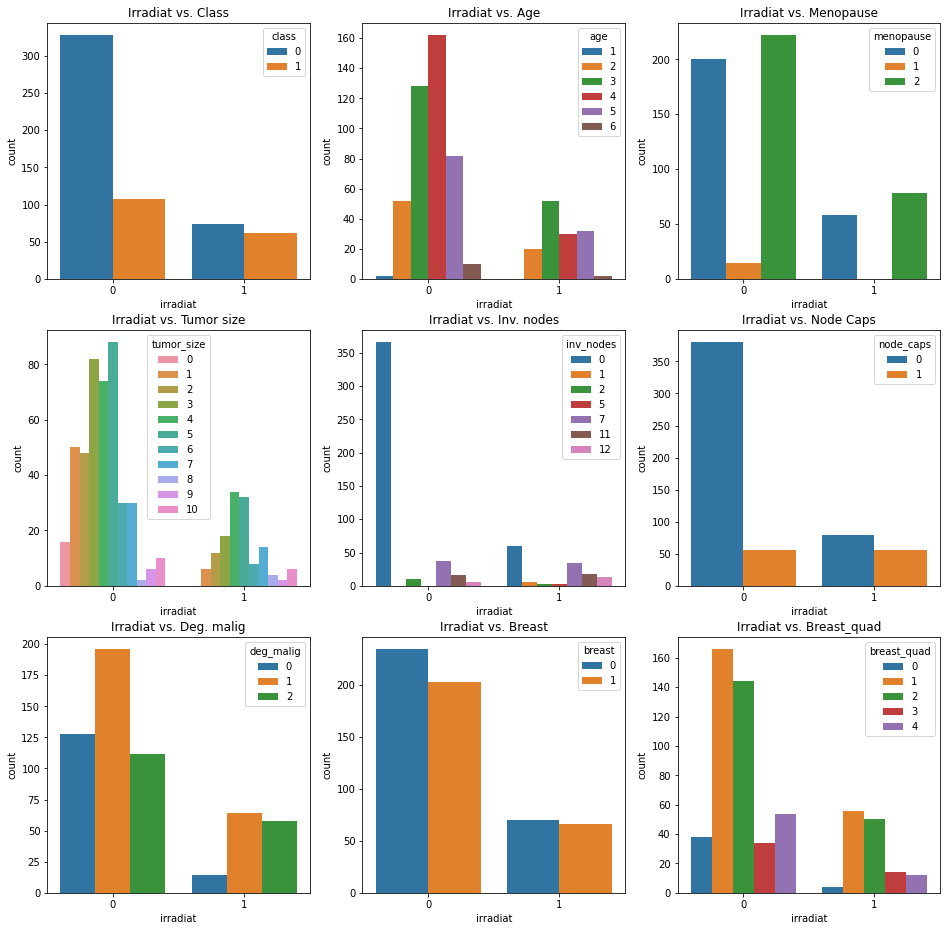

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
sns.countplot(x='irradiat', hue='class', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Irradiat vs. Class')
sns.countplot(x='irradiat', hue='age', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Irradiat vs. Age')
sns.countplot(x='irradiat', hue='menopause', data=data, ax=axs[0, 2])
axs[0, 2].set_title('Irradiat vs. Menopause')
sns.countplot(x='irradiat', hue='tumor_size', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Irradiat vs. Tumor size')
sns.countplot(x='irradiat', hue='inv_nodes', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Irradiat vs. Inv. nodes')
sns.countplot(x='irradiat', hue='node_caps', data=data, ax=axs[1, 2])
axs[1, 2].set_title('Irradiat vs. Node Caps')
sns.countplot(x='irradiat', hue='deg_malig', data=data, ax=axs[2, 0])
axs[2, 0].set_title('Irradiat vs. Deg. malig')
sns.countplot(x='irradiat', hue='breast', data=data, ax=axs[2, 1])
axs[2, 1].set_title('Irradiat vs. Breast')
sns.countplot(x='irradiat', hue='breast_quad', data=data, ax=axs[2, 2])
axs[2, 2].set_title('Irradiat vs. Breast_quad')


plt.show()

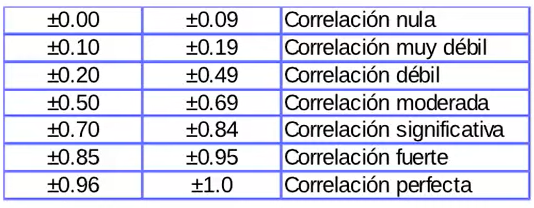

<Axes: >

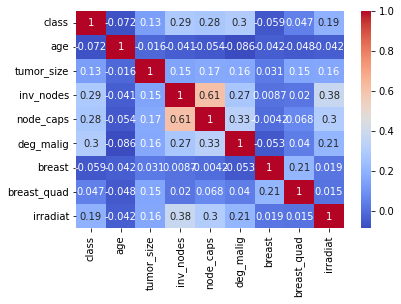

In [ ]:
numeric_columns = ['class','age', 'tumor_size', 'inv_nodes','node_caps', 'deg_malig','breast','breast_quad','irradiat']

# calcular la matriz de correlación
corr_matrix = data[numeric_columns].corr()

# imprimir la matriz de correlación
#print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

##**Métodos de Remuestreo**

###**Bootstraping**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad']], data['irradiat'], test_size=0.3)

### **Modelo K-NN**

Predicción con valor sugerido por la literatura, el cual se trata de la **raiz del número total de datos**.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Precisión del modelo k-NN: 75.00%


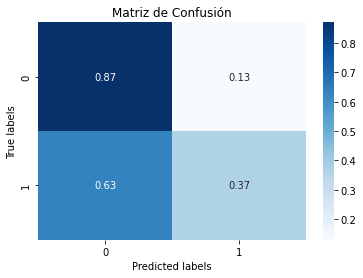

In [ ]:
# Crear una instancia de k-NN con k= RAIZ DE 286
knn = KNeighborsClassifier(n_neighbors=17)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo k-NN: {:.2f}%".format(accuracy*100))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)


# Calcular los porcentajes
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión con seaborn
sns.heatmap(cm_percent, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
for k in (100):
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train, y_train)
  knnpre[k]=knn.predict(X_test)

###**K-Means**

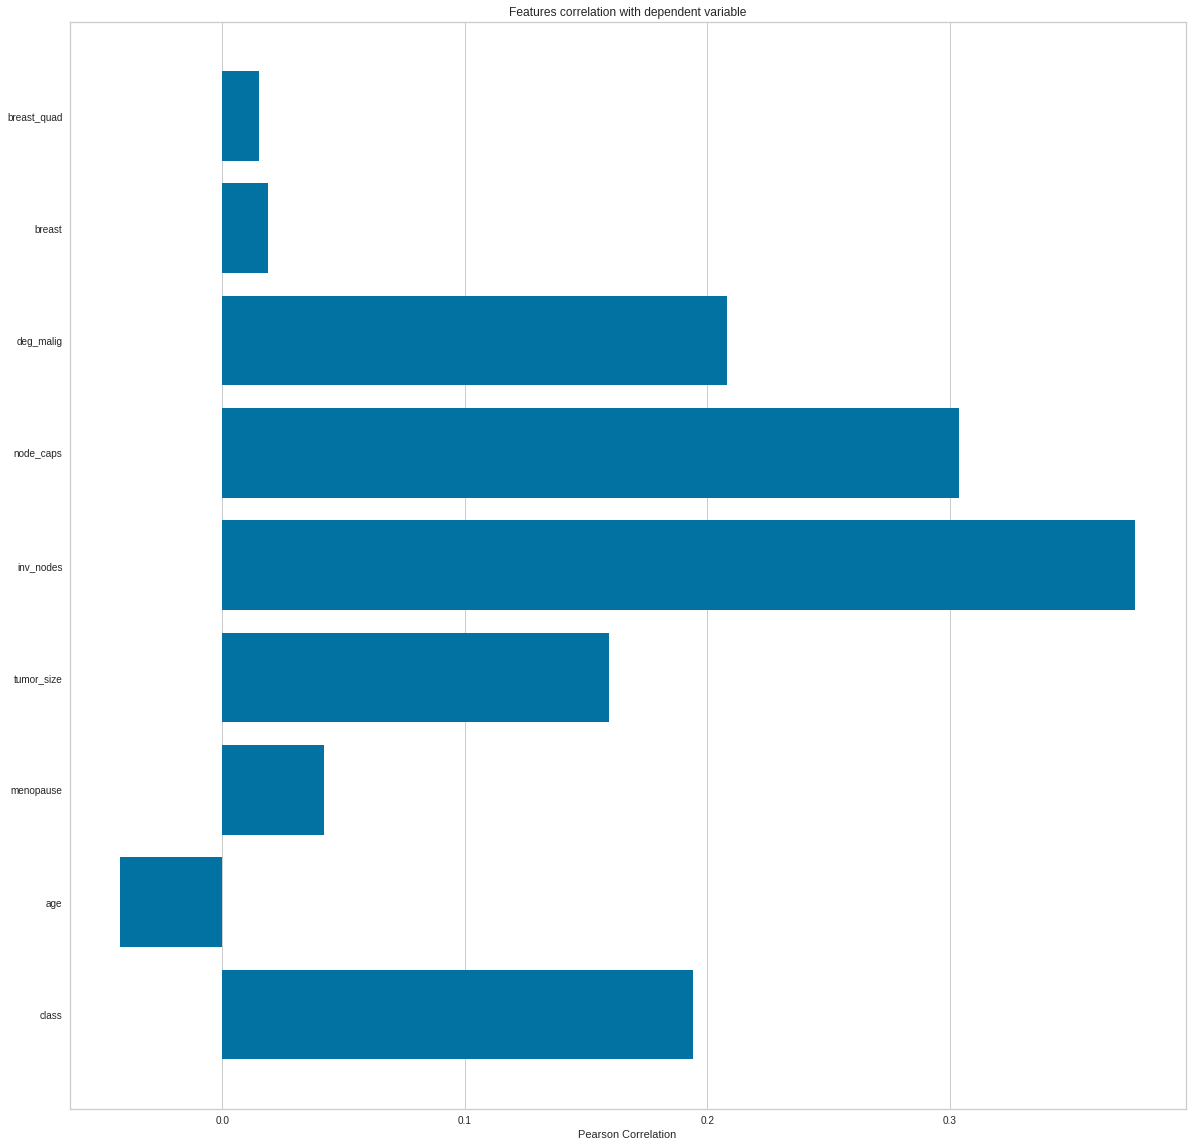

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation

column = ['class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad']
X, y = data[column], data['irradiat']

# Create a list of the feature names
features = np.array(column)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(X, y)
    sse.append(kmeans.inertia_)

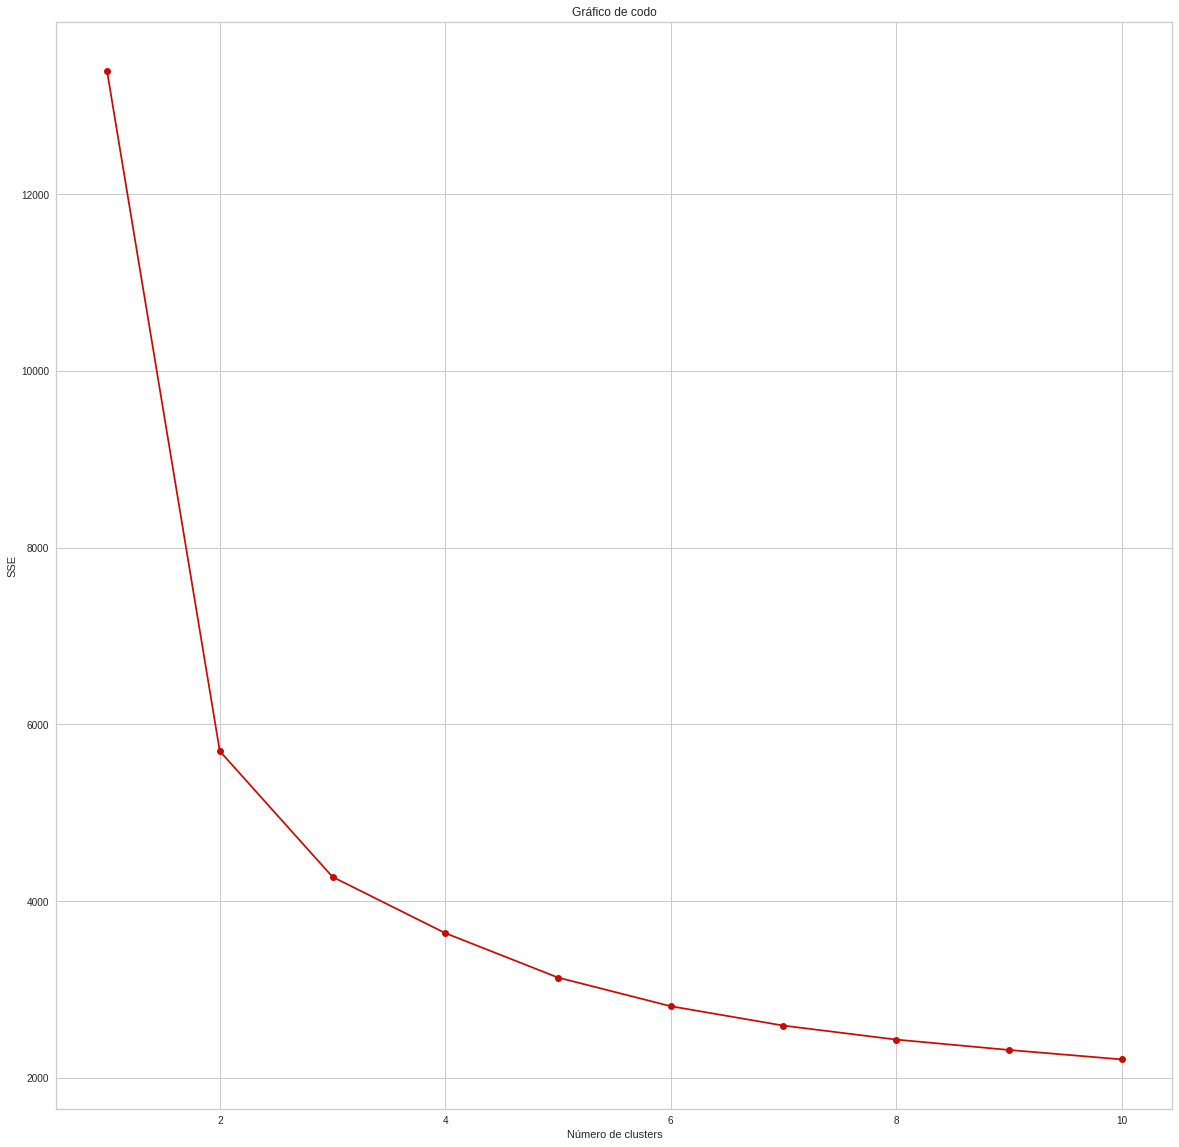

In [ ]:
plt.plot(range(1, 11), sse, marker='o', color='r')
plt.title('Gráfico de codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=2))])
X = data.select_dtypes(np.number)
cluster_pipeline.fit(X)
data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
method_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=method_embedding)
projection['irradiat'] = data['irradiat']
projection['cluster'] = data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'irradiat'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 572 samples in 0.002s...
[t-SNE] Computed neighbors for 572 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 572 / 572
[t-SNE] Mean sigma: 1.337133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.347366
[t-SNE] KL divergence after 1000 iterations: -0.411530


In [ ]:
treatment_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=2, 
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
treatment_cluster_pipeline.fit(X)
treatment_cluster_labels = treatment_cluster_pipeline.predict(X)
data['cluster_label'] = treatment_cluster_labels

In [ ]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
treatment_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=treatment_embedding)
projection['irradiat'] = data['irradiat']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'irradiat'])
fig.show()

In [ ]:
cluster_counts = projection['cluster'].value_counts()
print(cluster_counts)

1    418
0    154
Name: cluster, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score

# Calcular la inercia
inertia = treatment_cluster_pipeline.named_steps['kmeans'].inertia_

# Calcular el coeficiente de Silhouette
silhouette = silhouette_score(X, treatment_cluster_labels)

# Imprimir resultados
print("Inertia: ", inertia)
print("Silhouette Coefficient: ", silhouette)


Inertia:  4660.324551900483
Silhouette Coefficient:  0.40883221996770663


La inercia es una medida de cómo los puntos de un cluster están cercanos entre sí. Cuanto menor sea la inercia, mayor será la cohesión del cluster. En este caso, la inercia es de 2330.16, lo que indica que los puntos dentro de cada cluster están bastante cerca entre sí.

El coeficiente de Silhouette es una medida de cuánto se separan los clusters entre sí. Cuanto mayor sea el coeficiente de Silhouette, más separados estarán los clusters. El coeficiente de Silhouette varía entre -1 y 1, y un valor cercano a 1 indica que los clusters están bien separados. En este caso, el coeficiente de Silhouette es de 0.4069, lo que indica que los clusters están moderadamente bien separados.

###**Modelo Naives Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

Precisión: 73.84%


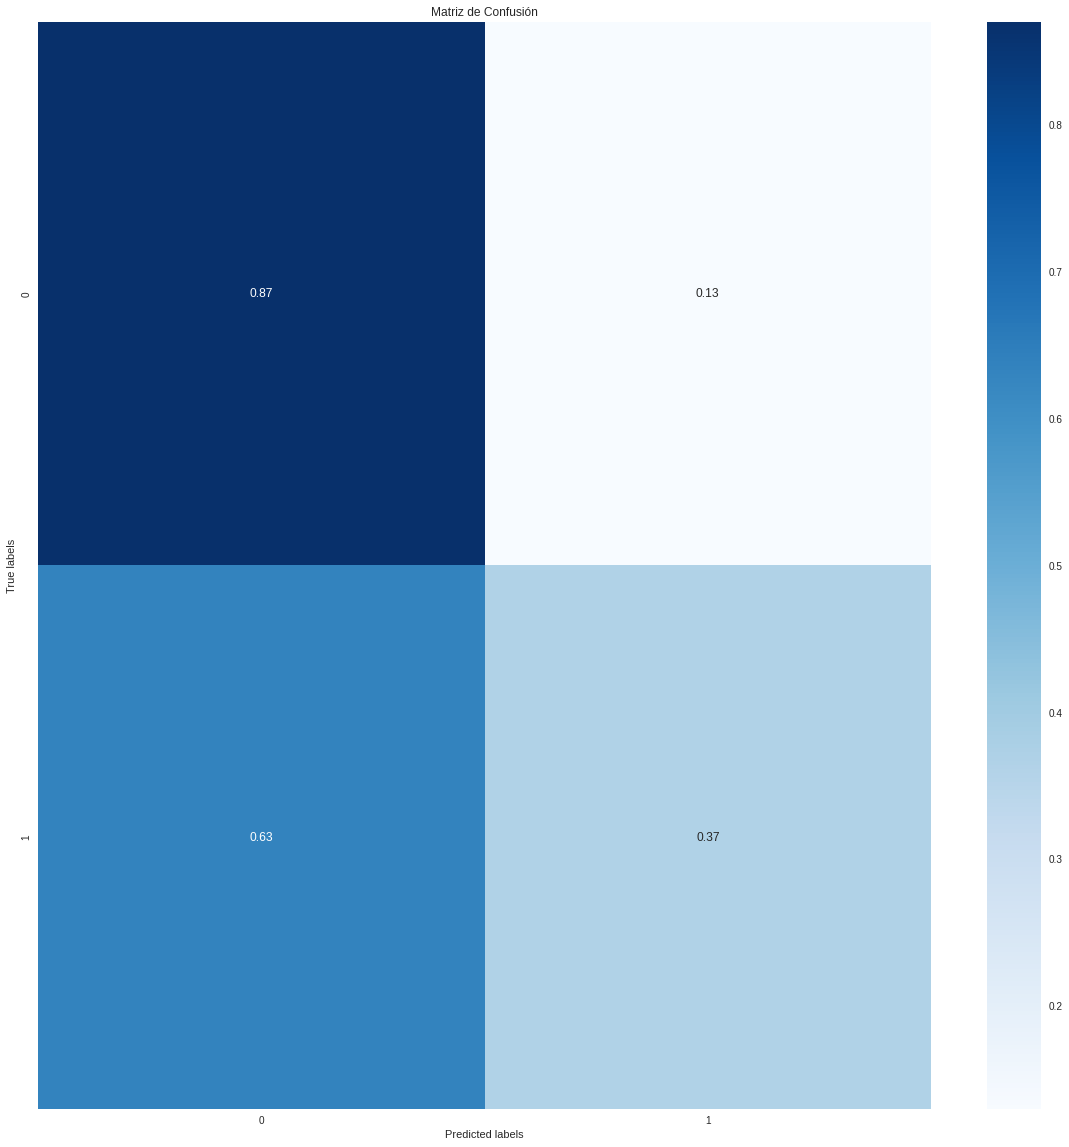

In [ ]:
# Crear instancia de clasificador Naive Bayes
gnb = GaussianNB()

# Entrenar modelo
gnb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred1 = gnb.predict(X_test)

# Calcular precisión del modelo
accuracy = accuracy_score(y_test, y_pred1)
print("Precisión: {:.2f}%".format(accuracy*100))

# Crear matriz de confusión
cm1 = confusion_matrix(y_test, y_pred)


# Calcular los porcentajes
cm_percent1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión con seaborn
sns.heatmap(cm_percent1, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión')
plt.show()

###**Árbol de Decision**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Precisión: 92.44%


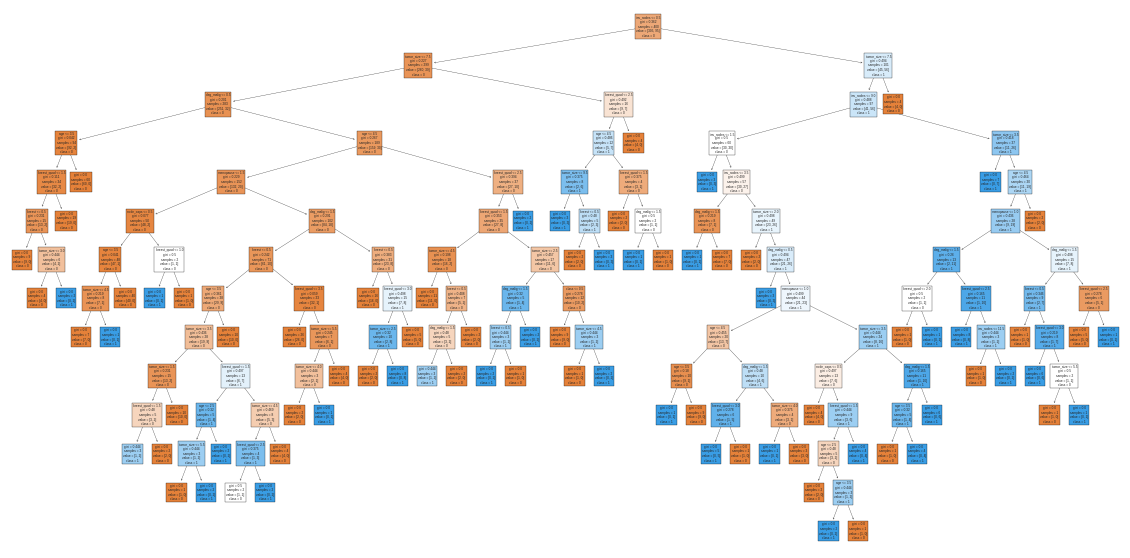

[[127   4]
 [  9  32]]


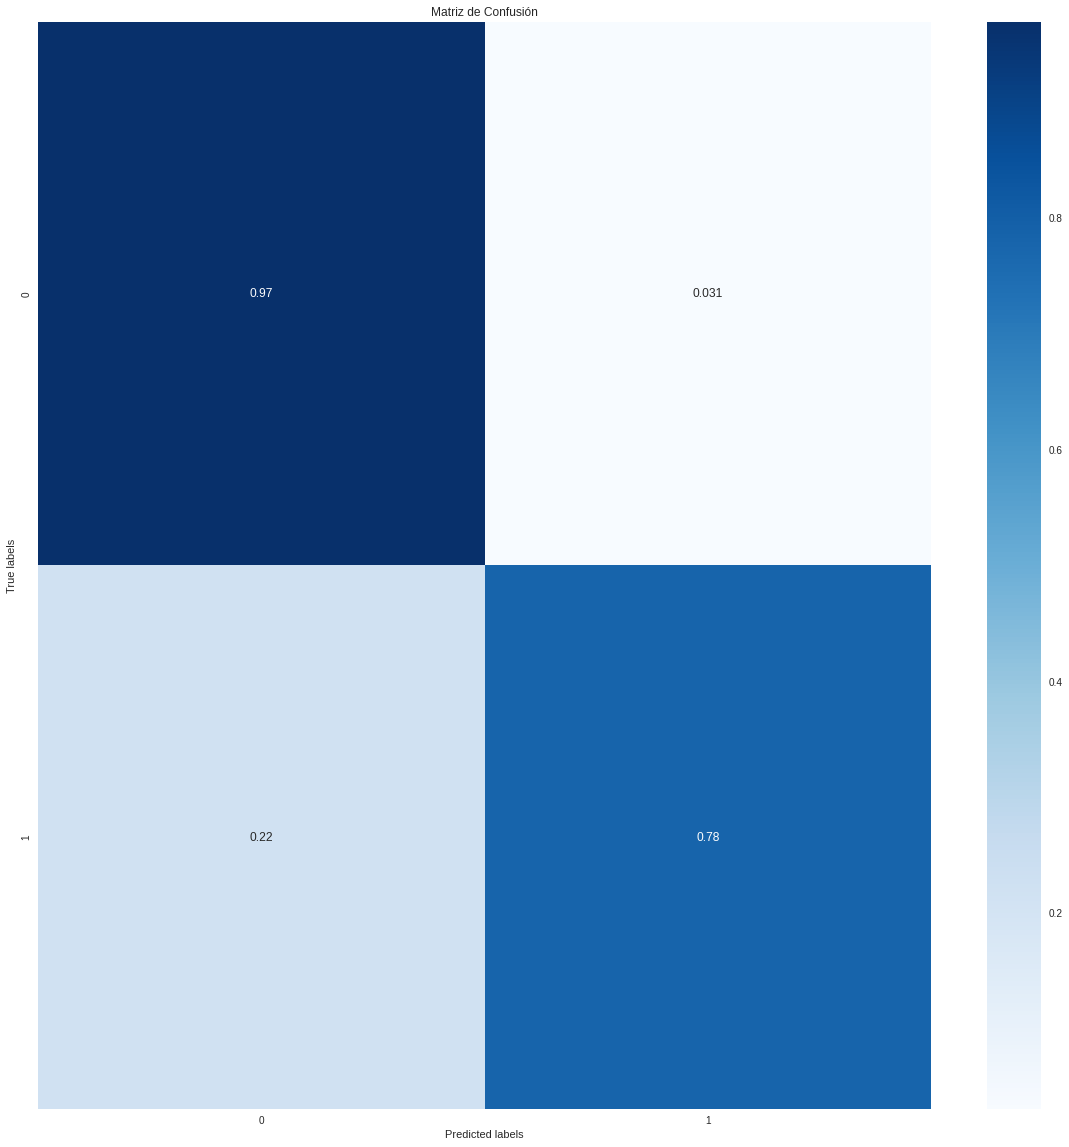

In [ ]:
#Entrenar Modelo
X = data.drop(columns=['irradiat'])
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#Calcular Precisión
accuracy = clf.score(X_test, y_test)
print("Precisión: {:.2f}%".format(accuracy*100))

#Crear gráfico de Árbol
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()

# Hacer predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calcular los porcentajes
cm_percent = cm.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión con seaborn
sns.heatmap(cm_percent, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión')
plt.show()

###**Modelo Adaboost**

Debido a que es un problema de clasificación, se debe realizar con el tipo de modelo Adaboost, especializado en este tipo de problema.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Precisión: 75.00%
[[116  15]
 [ 28  13]]


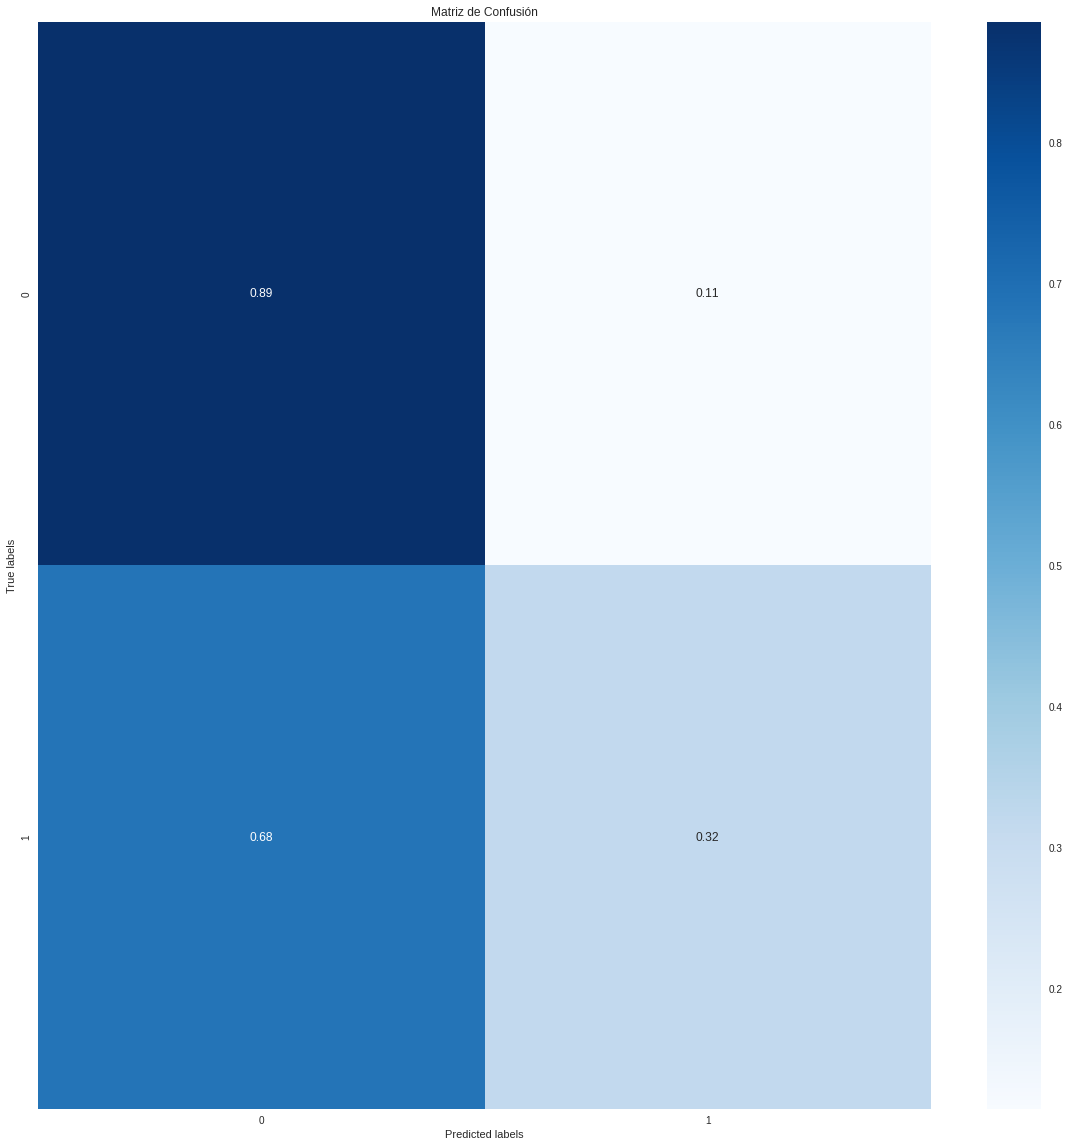

In [ ]:
# Definir el modelo base (clasificador de árbol de decisión)
base_clf = DecisionTreeClassifier(max_depth=1)

# Definir el modelo Adaboost
adaboost = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50, learning_rate=1.0, random_state=42)

# Entrenar el modelo Adaboost
adaboost.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = adaboost.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión: {:.2f}%".format(accuracy*100))

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calcular los porcentajes
cm_percent = cm.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión con seaborn
sns.heatmap(cm_percent, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ajustar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# hacer predicciones con el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# evaluar el rendimiento del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)


Exactitud del modelo: 0.7739130434782608


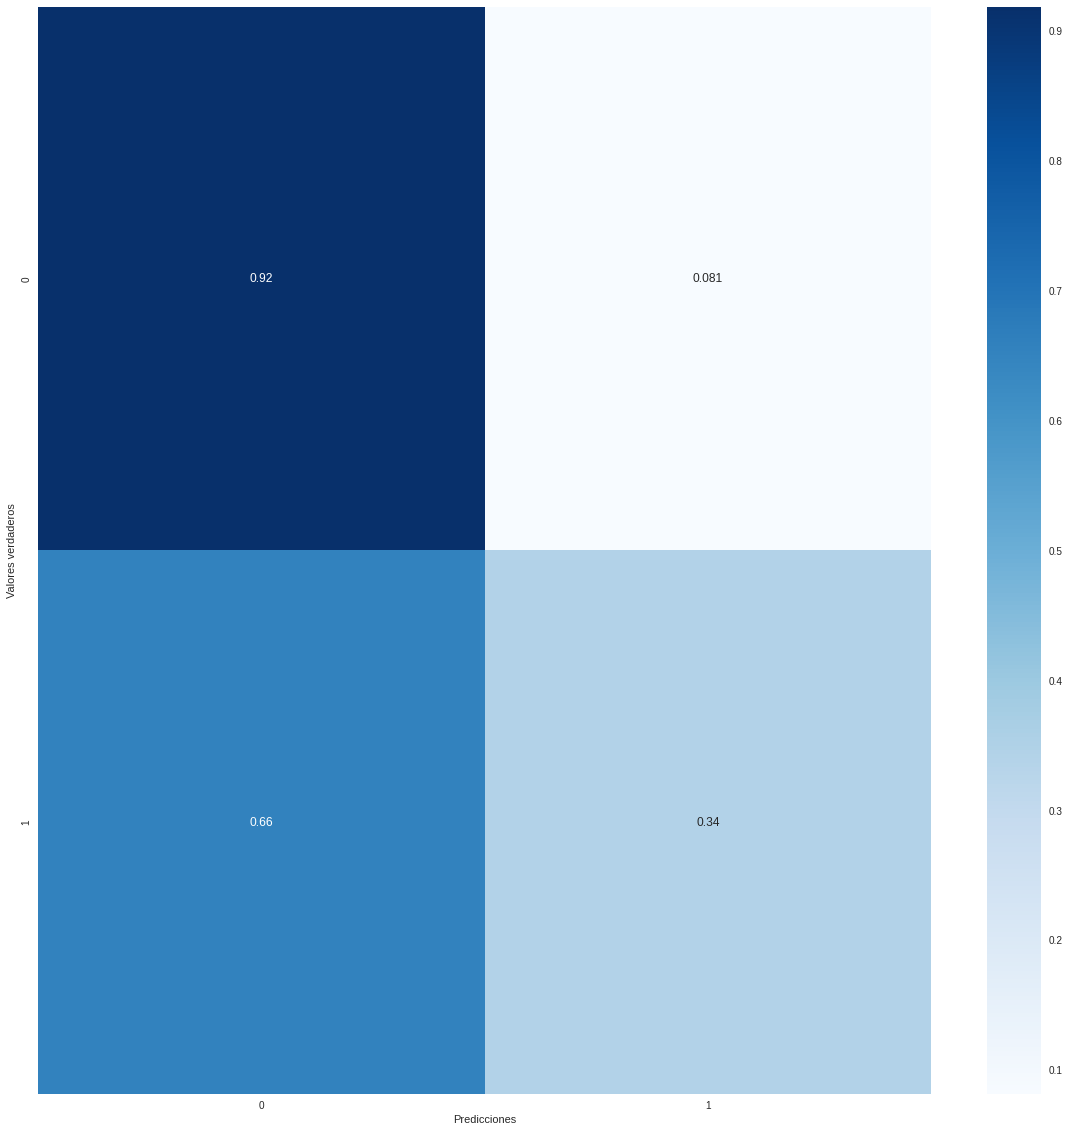

In [ ]:
# calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Graficar la matriz de confusión con seaborn
sns.heatmap(cm_percent, annot=True, cmap='Blues')

plt.xlabel("Predicciones")
plt.ylabel("Valores verdaderos")
plt.show()